In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
import urllib.request
from PIL import Image

In [2]:
train_path = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/train'
test_path = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/test'

In [3]:
image_size = (227, 227)
batch_size = 35

In [4]:
train_augment = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.3, horizontal_flip=True)
test_augment = ImageDataGenerator(rescale=1./255)

In [5]:
final_train = train_augment.flow_from_directory(train_path, target_size=image_size, batch_size=batch_size, class_mode='categorical')

Found 770 images belonging to 4 classes.


In [6]:
final_test = test_augment.flow_from_directory(test_path, target_size=image_size, batch_size=batch_size, class_mode='categorical')

Found 120 images belonging to 4 classes.


In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

In [8]:
# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Create a new model on top of the VGG16 base
final_arc = Sequential()
final_arc.add(base_model)
final_arc.add(Flatten())
final_arc.add(Dense(256, activation='relu'))
final_arc.add(Dense(4, activation='softmax'))

In [10]:
final_arc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
final_arc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [13]:
vgg16_history = final_arc.fit(final_train, epochs=30, validation_data=final_test, callbacks=[early_stopping])

Epoch 1/30
22/22 [==============================] - 60s 3s/step - loss: 2.6231 - accuracy: 0.4948 - val_loss: 1.2872 - val_accuracy: 0.6333
Epoch 2/30
22/22 [==============================] - 59s 3s/step - loss: 0.7479 - accuracy: 0.7468 - val_loss: 0.7562 - val_accuracy: 0.7000
Epoch 3/30
22/22 [==============================] - 59s 3s/step - loss: 0.5693 - accuracy: 0.7584 - val_loss: 0.6919 - val_accuracy: 0.7333
Epoch 4/30
22/22 [==============================] - 59s 3s/step - loss: 0.4677 - accuracy: 0.8338 - val_loss: 0.4091 - val_accuracy: 0.8583
Epoch 5/30
22/22 [==============================] - 59s 3s/step - loss: 0.4057 - accuracy: 0.8364 - val_loss: 0.3365 - val_accuracy: 0.9083
Epoch 6/30
22/22 [==============================] - 59s 3s/step - loss: 0.3030 - accuracy: 0.8922 - val_loss: 0.2537 - val_accuracy: 0.9417
Epoch 7/30
22/22 [==============================] - 59s 3s/step - loss: 0.2488 - accuracy: 0.9195 - val_loss: 0.2285 - val_accuracy: 0.9417
Epoch 8/30
22/22 [==

In [14]:
final_arc.save('vgg16_monkepox.h5')

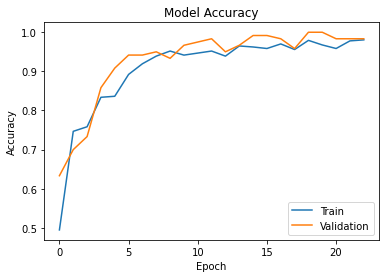

In [15]:
plt.plot(vgg16_history.history['accuracy'])
plt.plot(vgg16_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


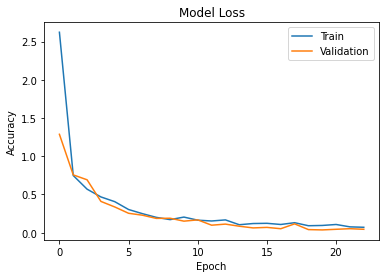

In [16]:
plt.plot(vgg16_history.history['loss'])
plt.plot(vgg16_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [17]:
class_labels = ['chickenpox', 'measles', 'monkeypox', 'normal']

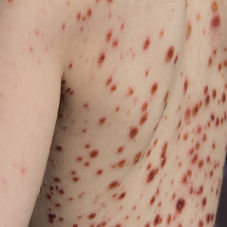

In [19]:
image_path = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Chickenpox/chickenpox70.png'
img1 = load_img(image_path, target_size=image_size)
img1

In [20]:
img_array = np.expand_dims(np.array(img1) / 255.0, axis=0)

In [21]:
predictions = final_arc.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels[predicted_class]

1/1 [==============================] - 0s 333ms/step


'chickenpox'

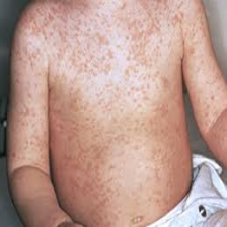

In [22]:
image_path = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Measles/measles6.png'
img2 = load_img(image_path, target_size=image_size)
img2

In [23]:
img_array = np.expand_dims(np.array(img2) / 255.0, axis=0)

In [24]:
predictions = final_arc.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels[predicted_class]

1/1 [==============================] - 0s 168ms/step


'measles'

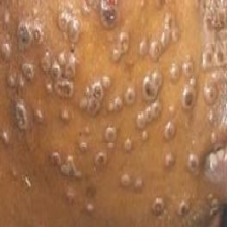

In [25]:
image_path = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Monkeypox/monkeypox214.png'
img3 = load_img(image_path, target_size=image_size)
img3

In [26]:
img_array = np.expand_dims(np.array(img3) / 255.0, axis=0)

In [27]:
predictions = final_arc.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels[predicted_class]

1/1 [==============================] - 0s 154ms/step


'monkeypox'

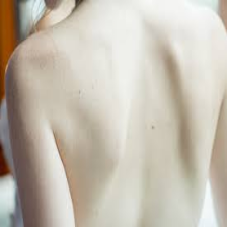

In [31]:
image_path = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Normal/normal10.png'
img4 = load_img(image_path, target_size=image_size)
img4

In [32]:
img_array = np.expand_dims(np.array(img4) / 255.0, axis=0)

In [33]:
predictions = final_arc.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels[predicted_class]

1/1 [==============================] - 0s 154ms/step


'normal'

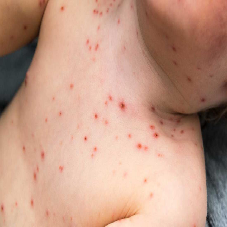

In [36]:
image_path = 'https://cdn-prod.medicalnewstoday.com/content/images/articles/322/322637/chickenpox.jpg'
urllib.request.urlretrieve(image_path, 'image.jpg')
img5 = load_img('image.jpg', target_size=image_size)
img5

In [37]:
img_array = np.expand_dims(np.array(img5) / 255.0, axis=0)

In [38]:
predictions = final_arc.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels[predicted_class]

1/1 [==============================] - 0s 162ms/step


'chickenpox'

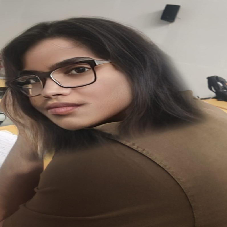

In [46]:
image_path = 'C:/Users/ASUS/OneDrive/Pictures/Saved Pictures/2.jpg'
img_personal = load_img(image_path, target_size=image_size)
img_personal

In [47]:
img_array = np.expand_dims(np.array(img_personal) / 255.0, axis=0)

In [48]:
predictions = final_arc.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels[predicted_class]

1/1 [==============================] - 0s 152ms/step


'normal'

In [ ]:
#LOL 